In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pandas as pd

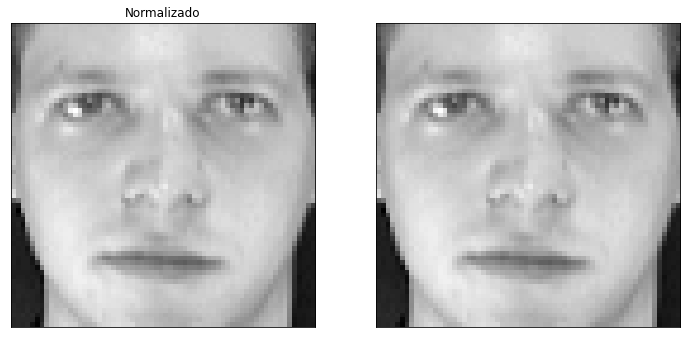

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6),
                       subplot_kw={'xticks': [], 'yticks': [],
                                   'facecolor': 'white'})
fig.patch.set_facecolor("white")
ax[0].imshow(data.data[0].reshape(64,64), cmap="gray")
ax[0].set_title("Normalizado")
ax[1].imshow(data.data[0].reshape(64,64) * 255, cmap="gray")

C:\Users\Cesar\AppData\Local\Temp\ipykernel_13464\2505428551.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caras = caras.append(cara)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_13464\2505428551.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caras = caras.append(cara)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_13464\2505428551.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caras = caras.append(cara)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_13464\2505428551.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caras = caras.append(cara)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_13464\2505428551.py:8: FutureWarning: Th

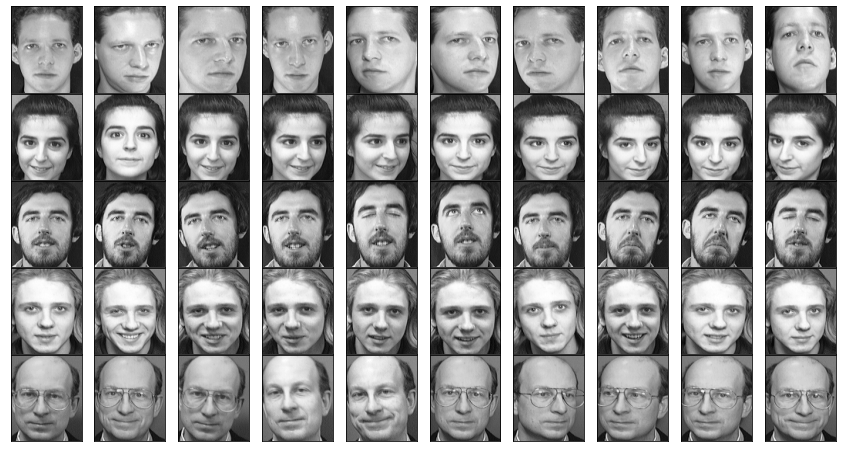

In [2]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/pca/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

In [3]:
from sklearn.decomposition import PCA

In [4]:
caras_pca = PCA(n_components=0.8)
caras_pca.fit(caras)

PCA(n_components=0.8)

In [5]:
caras_pca.n_components_

44

In [6]:
caras.index

Index(['./imagenes/pca\s1\1.pgm', './imagenes/pca\s1\10.pgm',
       './imagenes/pca\s1\2.pgm', './imagenes/pca\s1\3.pgm',
       './imagenes/pca\s1\4.pgm', './imagenes/pca\s1\5.pgm',
       './imagenes/pca\s1\6.pgm', './imagenes/pca\s1\7.pgm',
       './imagenes/pca\s1\8.pgm', './imagenes/pca\s1\9.pgm',
       ...
       './imagenes/pca\s9\1.pgm', './imagenes/pca\s9\10.pgm',
       './imagenes/pca\s9\2.pgm', './imagenes/pca\s9\3.pgm',
       './imagenes/pca\s9\4.pgm', './imagenes/pca\s9\5.pgm',
       './imagenes/pca\s9\6.pgm', './imagenes/pca\s9\7.pgm',
       './imagenes/pca\s9\8.pgm', './imagenes/pca\s9\9.pgm'],
      dtype='object', length=400)

In [7]:
caras_np = caras.to_numpy()
caras_cov = np.cov(caras_np.T, ddof=0)

In [8]:
eigen_values = np.linalg.eigvals(caras_cov)

In [162]:
[i/ sum(eigen_values) for i in eigen_values]

[0.4453588707943686,
 0.10136211494875005,
 0.04402949670255322,
 0.040388549503745416,
 0.026239575564674742,
 0.019996172865740347,
 0.01619967449602735,
 0.015524022300220939,
 0.012406438542162926,
 0.011197648147982124,
 0.010177552241834345,
 0.008067199852491595,
 0.007661638985253734,
 0.00658337017595755,
 0.006524273182860279,
 0.005962325819341548,
 0.005730806115934618,
 0.0052538103819515895,
 0.004953457624962568,
 0.004844139638987072,
 0.004474119452245846,
 0.004153615439907528,
 0.004002814990058288,
 0.0035801846716216144,
 0.0034307396113283616,
 0.003337017355541461,
 0.0032827843354559572,
 0.0031532724486644896,
 0.003081487266943712,
 0.003003584841739751,
 0.002796116838052322,
 0.002703665789491947,
 0.0026193719503752448,
 0.002526717614187234,
 0.0025019030804574374,
 0.0023508186659196547,
 0.0022714312407526457,
 0.002236447112887109,
 0.0021697542597618044,
 0.002055465929255545,
 0.001968387350851393,
 0.0019615861447030794,
 0.001898180018502564,
 0.001

In [138]:
pc_values = (eigen_values / np.sum(eigen_values))
pc_values

array([4.45358871e-01, 1.01362115e-01, 4.40294967e-02, 4.03885495e-02,
       2.62395756e-02, 1.99961729e-02, 1.61996745e-02, 1.55240223e-02,
       1.24064385e-02, 1.11976481e-02, 1.01775522e-02, 8.06719985e-03,
       7.66163899e-03, 6.58337018e-03, 6.52427318e-03, 5.96232582e-03,
       5.73080612e-03, 5.25381038e-03, 4.95345762e-03, 4.84413964e-03,
       4.47411945e-03, 4.15361544e-03, 4.00281499e-03, 3.58018467e-03,
       3.43073961e-03, 3.33701736e-03, 3.28278434e-03, 3.15327245e-03,
       3.08148727e-03, 3.00358484e-03, 2.79611684e-03, 2.70366579e-03,
       2.61937195e-03, 2.52671761e-03, 2.50190308e-03, 2.35081867e-03,
       2.27143124e-03, 2.23644711e-03, 2.16975426e-03, 2.05546593e-03,
       1.96838735e-03, 1.96158614e-03, 1.89818002e-03, 1.85275367e-03,
       1.80109245e-03, 1.76468003e-03, 1.71855786e-03, 1.67696209e-03,
       1.65223909e-03, 1.60640548e-03, 1.54164257e-03, 1.47496849e-03,
       1.45886762e-03, 1.44262977e-03, 1.40165940e-03, 1.37805970e-03,
      

In [145]:
pc_values.sort()
pc_values_inverted = pc_values[::-1]

In [151]:
np.sum(pc_values_inverted[:1])

0.44535887079436876

In [158]:
pc_values_inverted[:44]

array([0.44535887, 0.10136211, 0.0440295 , 0.04038855, 0.02623958,
       0.01999617, 0.01619967, 0.01552402, 0.01240644, 0.01119765,
       0.01017755, 0.0080672 , 0.00766164, 0.00658337, 0.00652427,
       0.00596233, 0.00573081, 0.00525381, 0.00495346, 0.00484414,
       0.00447412, 0.00415362, 0.00400281, 0.00358018, 0.00343074,
       0.00333702, 0.00328278, 0.00315327, 0.00308149, 0.00300358,
       0.00279612, 0.00270367, 0.00261937, 0.00252672, 0.0025019 ,
       0.00235082, 0.00227143, 0.00223645, 0.00216975, 0.00205547,
       0.00196839, 0.00196159, 0.00189818, 0.00185275])

In [152]:
caras_pca.explained_variance_ratio_

array([0.1760955 , 0.12906636, 0.06841042, 0.05578943, 0.05109913,
       0.03362534, 0.02447197, 0.02331064, 0.01962202, 0.01802781,
       0.01438923, 0.01397922, 0.0111904 , 0.01067274, 0.00974647,
       0.00913625, 0.00876042, 0.00844452, 0.00735491, 0.00695367,
       0.00670947, 0.0063851 , 0.00593076, 0.00543797, 0.00529091,
       0.00493587, 0.00481332, 0.00478886, 0.00448026, 0.0043614 ,
       0.00429076, 0.00399167, 0.00394501, 0.00380309, 0.00369536,
       0.0035037 , 0.00339997, 0.00336426, 0.00317379, 0.00300237,
       0.00295353, 0.00290716, 0.0028177 , 0.00277597])

In [107]:
np.sum(caras_pca.explained_variance_ratio_)

0.8009047228214782

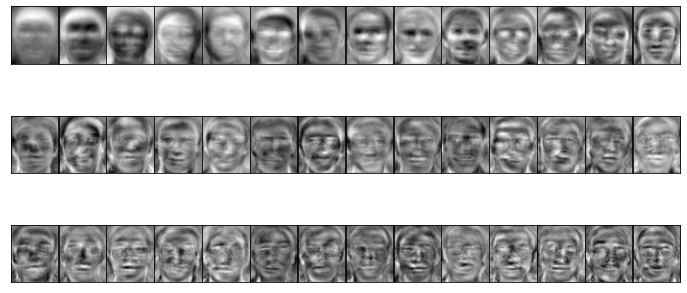

In [104]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [100]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

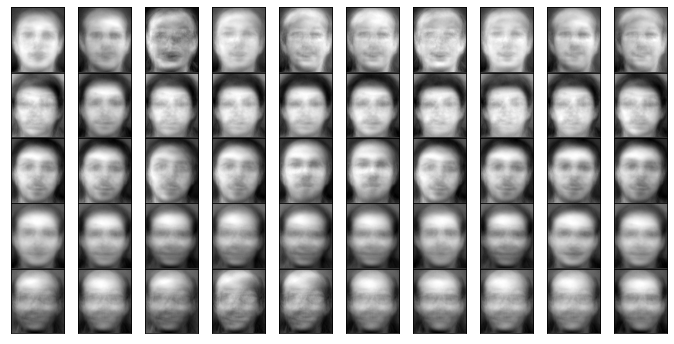

In [101]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(5,10, figsize=(12, 6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")